## Viz for seq multi networks

In [99]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
sns.set(color_codes=True)

### Color palettes

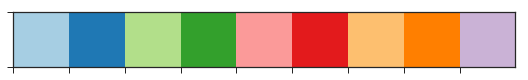

In [123]:
pairs = sns.palplot(sns.color_palette("Paired", 9))
sns.set_palette(pairs)

### Loading histories

In [124]:
mult_dir = os.listdir('../../Model_histories/Multi/')
hist_dic = {}
count = 0

for i in mult_dir:
    if 'Seq' in i:
        count += 1
        with open(os.path.join('../../Model_histories/Multi', i), 'rb') as file:
            hist = pickle.load(file)
        
        hist_dic['hist_{}'.format(count)] = [hist, i]

In [125]:
## Baseline history from 2280
base_path = os.path.join('../../Model_histories/sequential/', 'history_auto_adadelta_mse_(2280, 1140, 2280)_time_valS_True_seq')

with open(base_path, 'rb') as file:
    base_hist = pickle.load(file)

In [126]:
# Function to get the max value of for some metric and hist pos
def get_max_hist(pos, metric):
    history = hist_dic.get('hist_{}'.format(pos))[0]
    start_mean = 30
    if 'Auto' in metric:
        if 'close' in metric:
            return np.mean(history['val_decoded_Auto_2_closeness_non_zero'][start_mean::])
        else:
            return np.mean(history['val_decoded_Auto_2_non_zero'][start_mean::])
    elif 'Y' in metric:
        if 'close' in metric:
            return np.mean(history['val_decoded_Y_2_closeness_non_zero'][start_mean::])
        else:
            return np.mean(history['val_decoded_Y_2_non_zero'][start_mean::])


## mean plotting cutoff list
close_cut_Y = []
non_cut_Y = []
close_cut_A = []
non_cut_A = []
for i in range(1, len(hist_dic) + 1):
    close_cut_Y.append(get_max_hist(i, 'close_Y'))
    non_cut_Y.append(get_max_hist(i, 'Y_non'))
    close_cut_A.append(get_max_hist(i, 'Auto_close'))
    non_cut_A.append(get_max_hist(i, 'Auto_non'))

### Plotting different weights for decoded Y

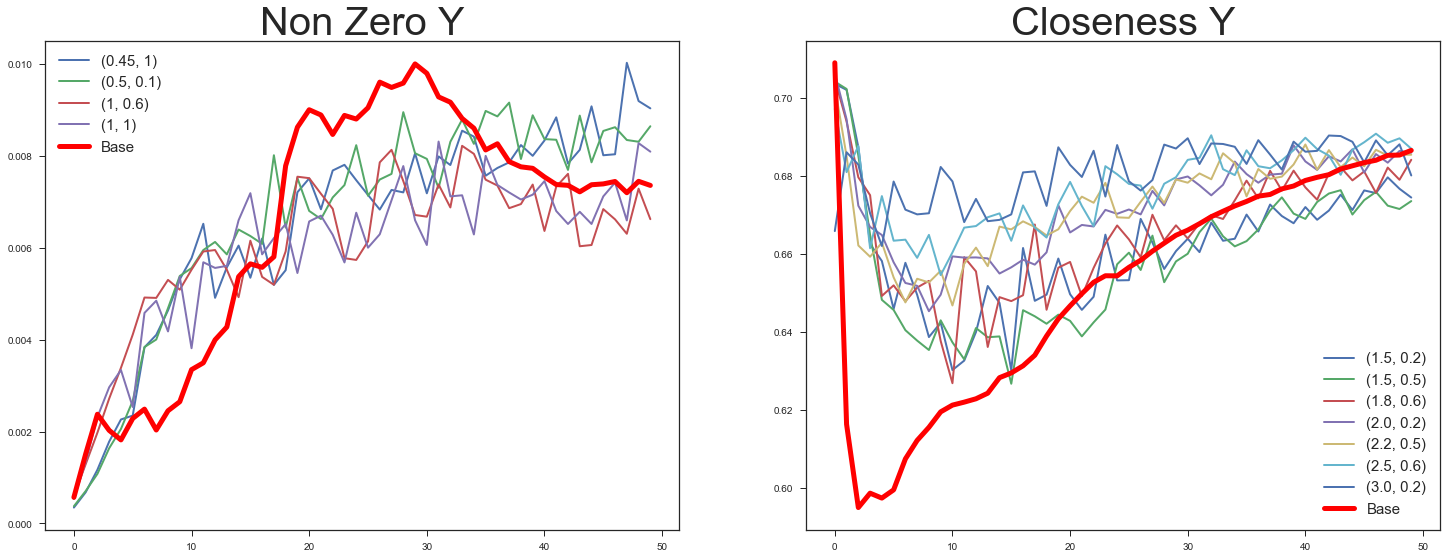

In [129]:
plt.figure(figsize=(25,9))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i in range(1,len(hist_dic) + 1):
    if get_max_hist(i, 'close_Y') > np.mean(close_cut_Y):
        
        hist = hist_dic.get('hist_{}'.format(i))[0]
        label = hist_dic.get('hist_{}'.format(i))[1][84:-4]
        ax2.plot(hist['val_decoded_Y_2_closeness_non_zero'], label=label, lw=2)
        
    if get_max_hist(i, 'non_Y') > np.mean(non_cut_Y):
        hist = hist_dic.get('hist_{}'.format(i))[0]
        label = hist_dic.get('hist_{}'.format(i))[1][84:-4]
        ax1.plot(hist['val_decoded_Y_2_non_zero'], label=label, lw=2)
        
    
ax1.plot(base_hist['val_non_zero'], c='red', lw=5, label='Base')
ax2.plot(base_hist['val_closeness_non_zero'], c='red', lw=5, label='Base')
sns.set_style('ticks')
ax1.legend(prop={'size': 15})
ax1.set_title('Non Zero Y', size=40)

ax2.legend(prop={'size': 15})
ax2.set_title('Closeness Y', size=40)
plt.grid(False)
plt.show()
    

### Analysis:

##### $\bullet$ Closeness is better when the weights of Y are greater
##### $\bullet$ Non Zero is better for weights favoring Auto 
#####  $\hspace{10mm}$ -Outperforms the baseline, so definetly something to look into

### Plotting different weights for decoded Auto

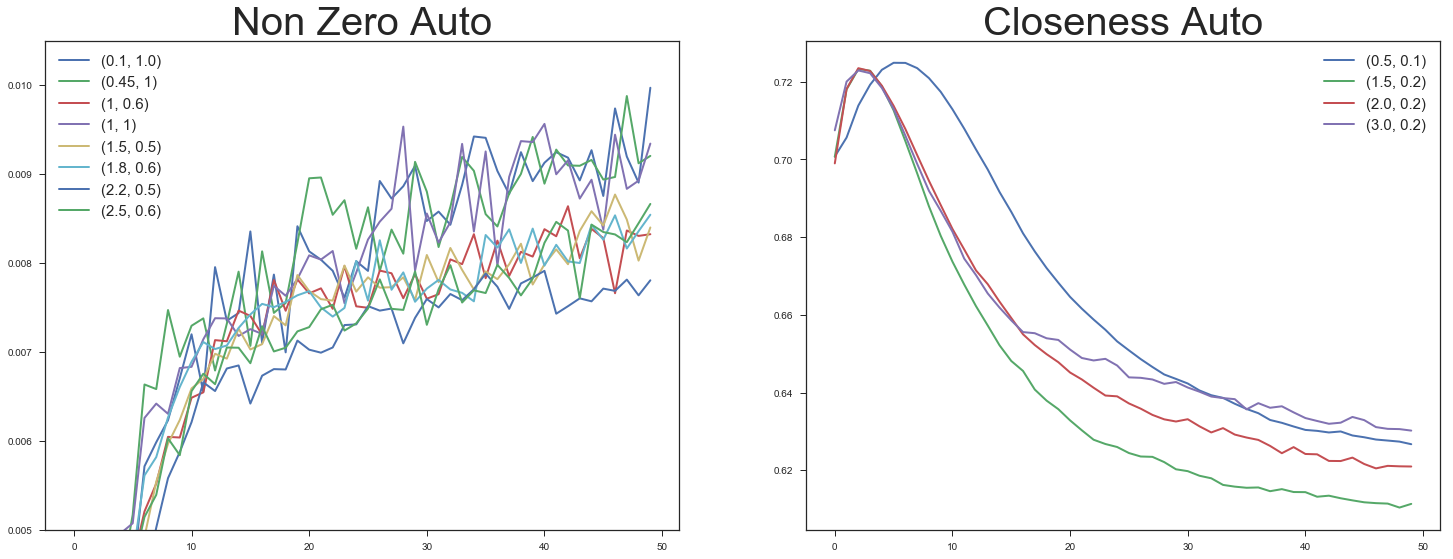

In [136]:
plt.figure(figsize=(25,9))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i in range(1,len(hist_dic) + 1):
    if get_max_hist(i, 'close_Auto') > np.mean(close_cut_A):
        
        hist = hist_dic.get('hist_{}'.format(i))[0]
        label = hist_dic.get('hist_{}'.format(i))[1][84:-4]
        ax2.plot(hist['val_decoded_Auto_2_closeness_non_zero'], label=label, lw=2)
        
    if get_max_hist(i, 'non_Auto') > np.mean(non_cut_A):
        hist = hist_dic.get('hist_{}'.format(i))[0]
        label = hist_dic.get('hist_{}'.format(i))[1][84:-4]
        ax1.plot(hist['val_decoded_Auto_2_non_zero'], label=label, lw=2)

sns.set_style('ticks')
ax1.legend(prop={'size': 15})
ax1.set_title('Non Zero Auto', size=40)
ax1.set_ylim(0.005, 0.0105)

ax2.legend(prop={'size': 15})
ax2.set_title('Closeness Auto', size=40)
plt.grid(False)
plt.show()

#### Analysis:

##### $\bullet$ Weights (0.5, 0.1) perform poorly due to the small gradient caused by the diminished loss functions
##### $\bullet$ For Non Zero, it is almost indistinguishable for similar weights
##### $\hspace{10mm}$ -The only impacting factor seems the be the Auto weight. Notice that weight of 1 have similar outputs
##### $\bullet$ It is hard to tell which weight is better for closeness, because the small gradient of (0.5,0.1) obfuscates the results